In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [3]:
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

In [4]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [5]:
#Conteo de lanzamientos por sitio
launch_counts = df['LaunchSite'].value_counts()
print(launch_counts)

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [6]:
# Conteo de ocurrencias para cada tipo de órbita
orbit_counts = df['Orbit'].value_counts()
print(orbit_counts)


Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


In [7]:
# Conteo de resultados de aterrizajes
landing_outcomes = df['Outcome'].value_counts()
print(landing_outcomes)


Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [8]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [9]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [10]:
bad_outcome = {"Failure: Parachute Failure", "Failure: Engine Failure", ...}  # Añade todos los malos resultados aquí
landing_class = [0 if outcome in bad_outcome else 1 for outcome in df['Outcome']]


In [11]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1


In [12]:
df["Class"].mean()

1.0

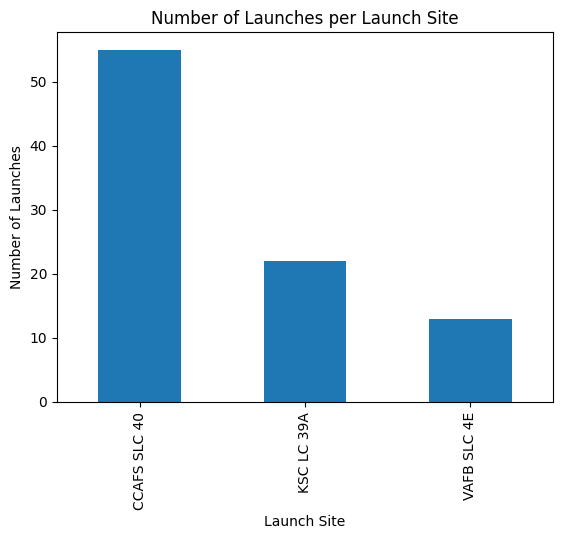

In [13]:
launch_counts = df['LaunchSite'].value_counts()
launch_counts.plot(kind='bar')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Launch Site')
plt.show()

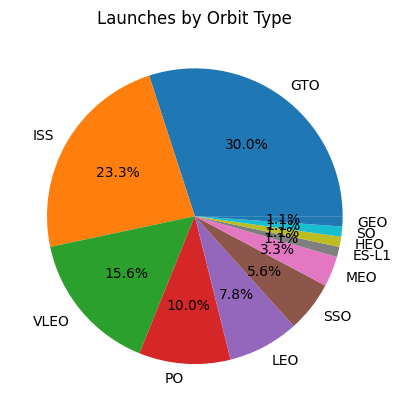

In [14]:
orbit_counts = df['Orbit'].value_counts()
orbit_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Launches by Orbit Type')
plt.ylabel('')
plt.show()


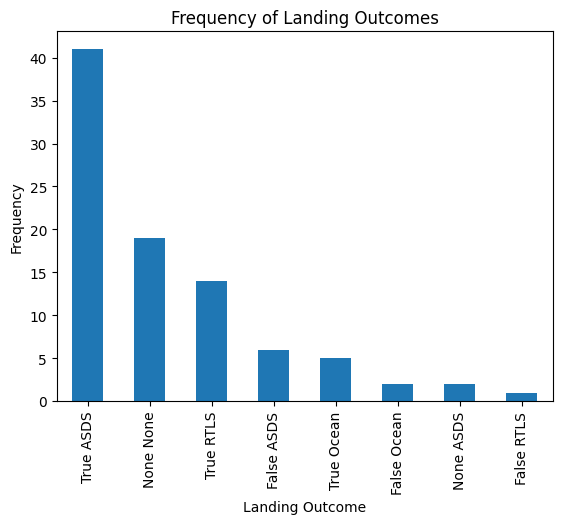

In [15]:
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes.plot(kind='bar')
plt.xlabel('Landing Outcome')
plt.ylabel('Frequency')
plt.title('Frequency of Landing Outcomes')
plt.show()


In [17]:
# Asegúrate de que esta línea se ejecute correctamente
df['success'] = df['Outcome'].apply(lambda x: 1 if 'True' in x else 0)
# Verifica si la columna 'success' está presente
print(df.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  success  
0            0  B0003  -80.577366  28.561

In [24]:
# Crear un mapa base centrado en el promedio de las coordenadas
mapa = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# Preparar los datos para el mapa de calor
heatmap_data = df[['Latitude', 'Longitude', 'success']].values.tolist()

# Agregar puntos al mapa de calor con parámetros ajustados
HeatMap(heatmap_data, radius=25, blur=20, max_zoom=1).add_to(mapa)

# Agregar puntos al mapa de calor con parámetros ajustados para una mejor visualización
HeatMap(heatmap_data, radius=10000, blur=70, max_zoom=400).add_to(mapa)

# Mostrar el mapa
mapa

